# Analysis 
Now that we have generated 1000 random wiki pages and found their paths to philosophy, it's time to do some analysis! 

In [58]:
import pandas as pd
import os
import re
import feather
import matplotlib.pyplot as plt

In [69]:
df = pd.read_feather('links_to_philosophy.feather')

# make list of links in 'chain' column 
def linksToList(x): # path is comma separated string of wikilinks 
    x = x.split(r'https://')[1:]
    return [r'https://' + p for p in x] # return list of working wikilinks 
df.chain = df.chain.map(lambda x: linksToList(x))

# make 'failed' column which shows whether web scraping failed 
def failed(x): 
    if len(x) == 0: 
        return True
    else: 
        return False
df['failed'] = df.chain.map(lambda x: failed(x))

# remove failed rows
df = df[~df.failed == True] 
df['finalLink'] = df.chain.map(lambda x: x[-1])

# display 
percPhilo = round(len(df[df.philosophy == True]) / (len(df)) * 100, 1) 
print('% links that reached philosophy: {}'.format(percPhilo))

# strip commas from links in chain 
def commaStrip(x): # x = list of links
    linksN = []
    for link in x: 
        link = link.strip(',')
        link = link.lstrip('https://en.wikipedia.org/wiki/')
        linksN.append(link)
    return linksN

df.chain = df.chain.map(lambda x: commaStrip(x))

df = df[df.philosophy == True]
print('rows, columns: {}'.format(df.shape))
df.head()

% links that reached philosophy: 78.0
rows, columns: (713, 5)


,rLinks,chain,philosophy,failed,finalLink
0,"https://en.wikipedia.org/wiki/Mansurlu,_Feke","[Mansurlu,_Feke, Feke, Adana_Province, Provinc...",True,False,https://en.wikipedia.org/wiki/Philosophy
1,https://en.wikipedia.org/wiki/Net_neutrality_i...,"[Net_neutrality_in_the_Netherlands, Netherland...",True,False,https://en.wikipedia.org/wiki/Philosophy
2,https://en.wikipedia.org/wiki/Richard_Sissons,"[Richard_Sissons, Kingston_upon_Hull, Port_cit...",True,False,https://en.wikipedia.org/wiki/Philosophy
3,https://en.wikipedia.org/wiki/Meriwether_Natio...,"[Meriwether_National_Golf_Club, Washington_Cou...",True,False,https://en.wikipedia.org/wiki/Philosophy
5,https://en.wikipedia.org/wiki/Kristina_Fröjmark,"[Kristina_Fröjmark, Reality_show, Genre, Commu...",True,False,https://en.wikipedia.org/wiki/Philosophy


## Network analysis

In [109]:
import networkx as nx
g = nx.Graph()

In [110]:
df = df.head()

def addEdge(x): # x = list of links
    for i in range(len(x)-1): 
        g.add_edge(x[i], x[i+1])

df.chain.map(lambda x: addEdge(x))

0    None
1    None
2    None
3    None
5    None
Name: chain, dtype: object

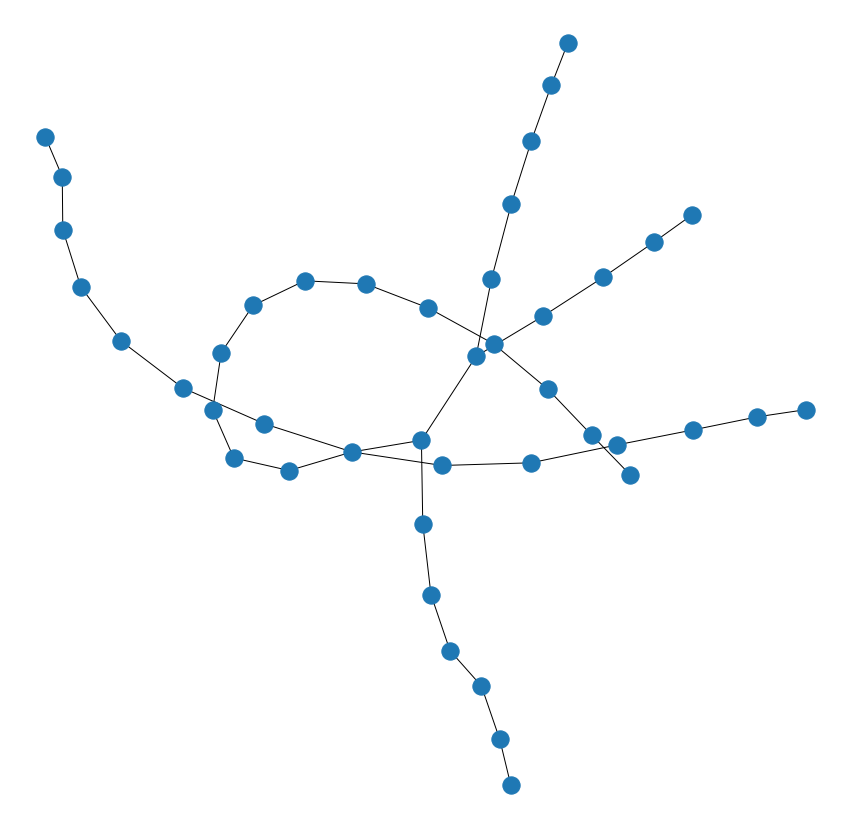

In [111]:
# pos = nx.spring_layout(g)
fig, ax = plt.subplots(1,1,figsize=(15,15))
nx.draw_spring(g, ax=ax)

## following tutorial 
https://www.youtube.com/watch?v=flwcAf1_1RU&ab_channel=ProfessorFoote

In [105]:
g = nx.barabasi_albert_graph(100,2)

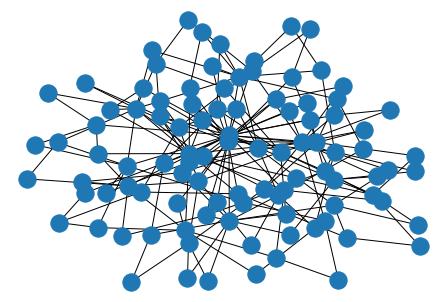

In [106]:
nx.draw_spring(g)

(array([76., 12.,  6.,  2.,  2.,  0.,  1.,  0.,  0.,  1.]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <a list of 10 Patch objects>)

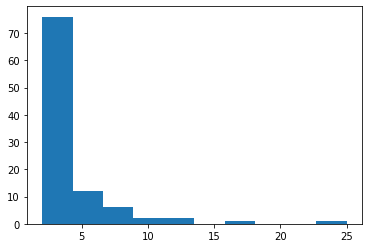

In [107]:
plt.hist([v for k,v in nx.degree(g)])